In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15996, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 15996 (delta 99), reused 112 (delta 69), pack-reused 15831
Receiving objects: 100% (15996/15996), 14.65 MiB | 9.22 MiB/s, done.
Resolving deltas: 100% (10968/10968), done.


In [4]:
#!pip install torch  #YOLOv5 runs on top of PyTorch

In [11]:
import torch

In [6]:
from IPython.display import Image #this is to render predictions

In [7]:
!pip install -U -r requirements.txt

# Split the dataset into train and val 

In [3]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'dataset/images/train'
valPath = 'dataset/images/val'
crsPath = 'data/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  592
Validation images are :  148


In [4]:
trainimagePath = 'dataset/images/train'
trainlabelPath = 'dataset/labels/train'
valimagePath = 'dataset/images/val'
vallabelPath = 'dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val di
shutil.move(crsPath, valPath) 

'dataset/images/val/ts'

## Training

In [ ]:
!python yolov5/train.py --img 415 --batch 16 --epochs 30 --data dataset/dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.9.7 torch-2.0.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.

                 Class     Images  Instances          P          R      mAP50   

In [11]:
data_dir='./yolov5'

In [12]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('yolov5')

### Load Image using PIL

In [33]:
import PIL
pred_img=list(data_dir.glob('runs/train/exp/*.jpg'))
pred_img

[PosixPath('yolov5/runs/train/exp/val_batch1_labels.jpg'),
 PosixPath('yolov5/runs/train/exp/val_batch2_pred.jpg'),
 PosixPath('yolov5/runs/train/exp/labels_correlogram.jpg'),
 PosixPath('yolov5/runs/train/exp/val_batch0_labels.jpg'),
 PosixPath('yolov5/runs/train/exp/train_batch0.jpg'),
 PosixPath('yolov5/runs/train/exp/train_batch1.jpg'),
 PosixPath('yolov5/runs/train/exp/train_batch2.jpg'),
 PosixPath('yolov5/runs/train/exp/val_batch1_pred.jpg'),
 PosixPath('yolov5/runs/train/exp/val_batch0_pred.jpg'),
 PosixPath('yolov5/runs/train/exp/labels.jpg'),
 PosixPath('yolov5/runs/train/exp/val_batch2_labels.jpg')]

### Predictions

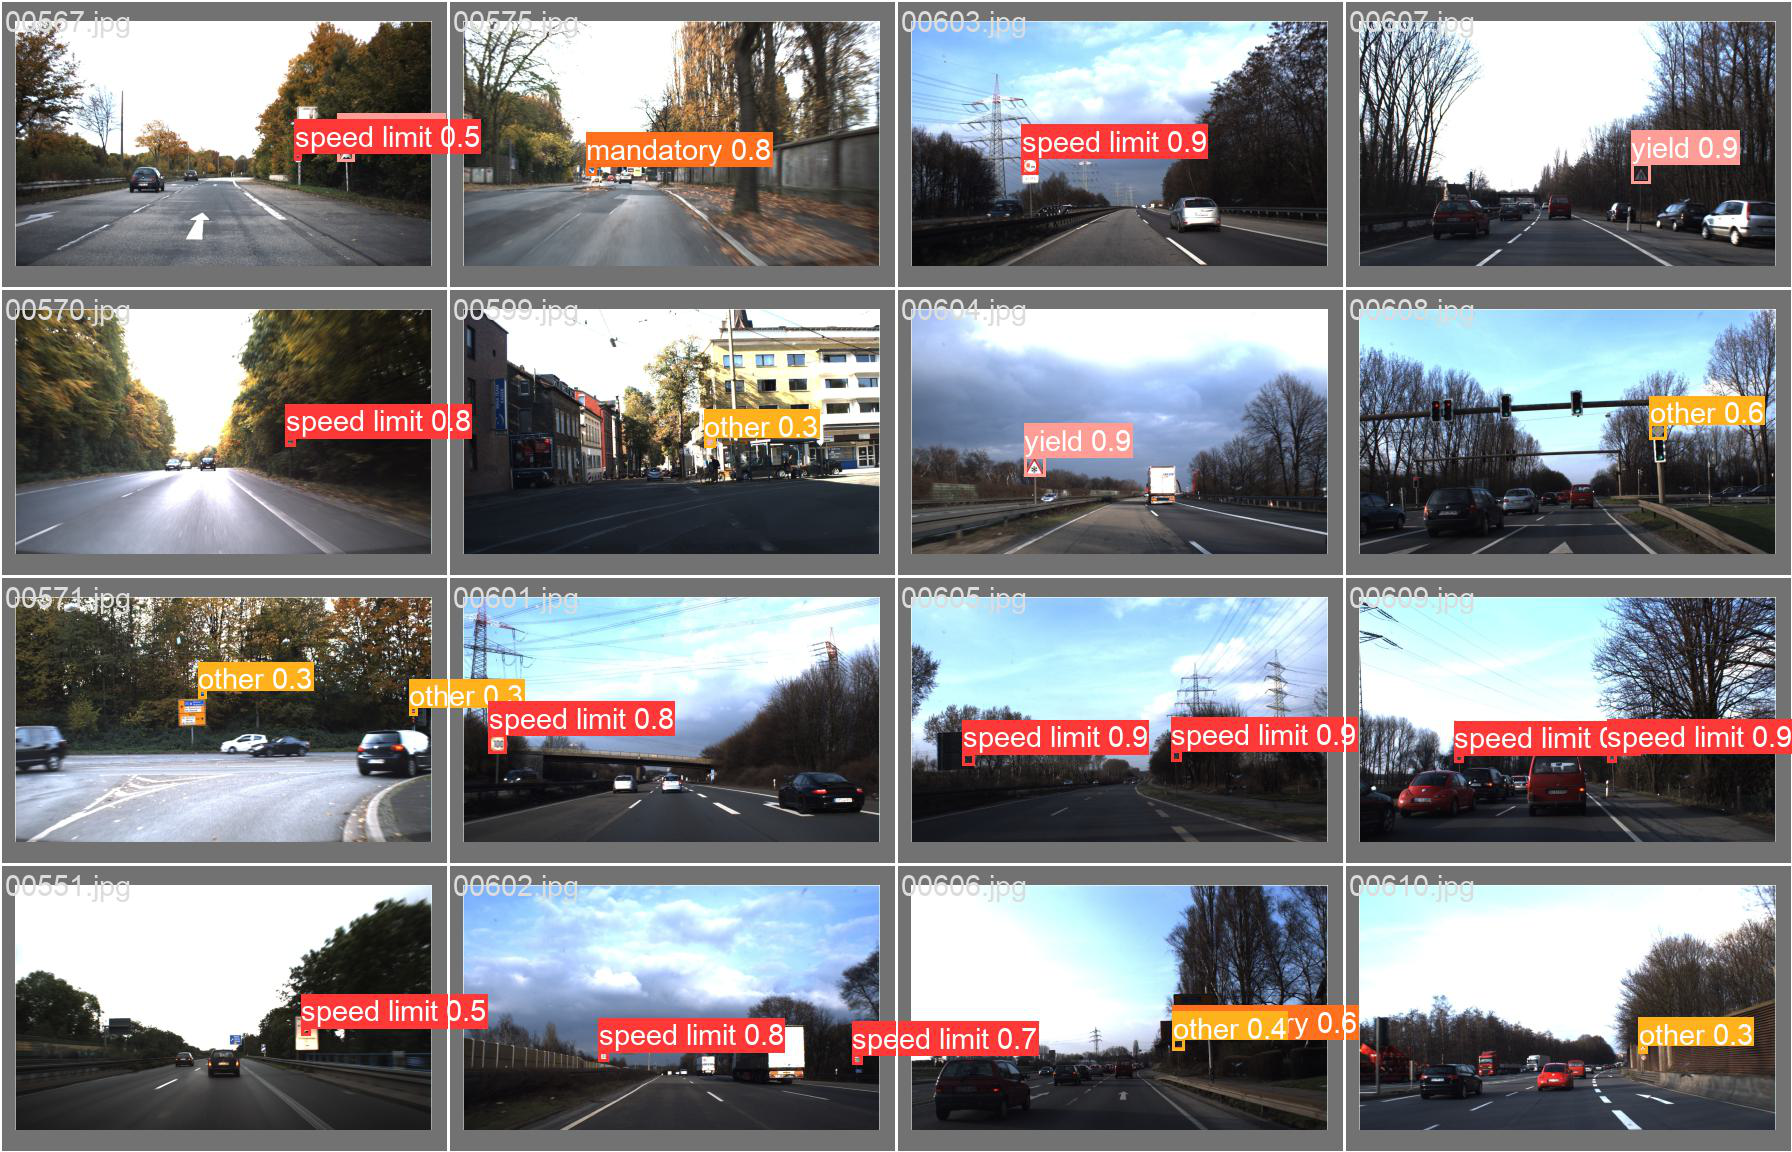

In [34]:
PIL.Image.open(str(pred_img[1]))

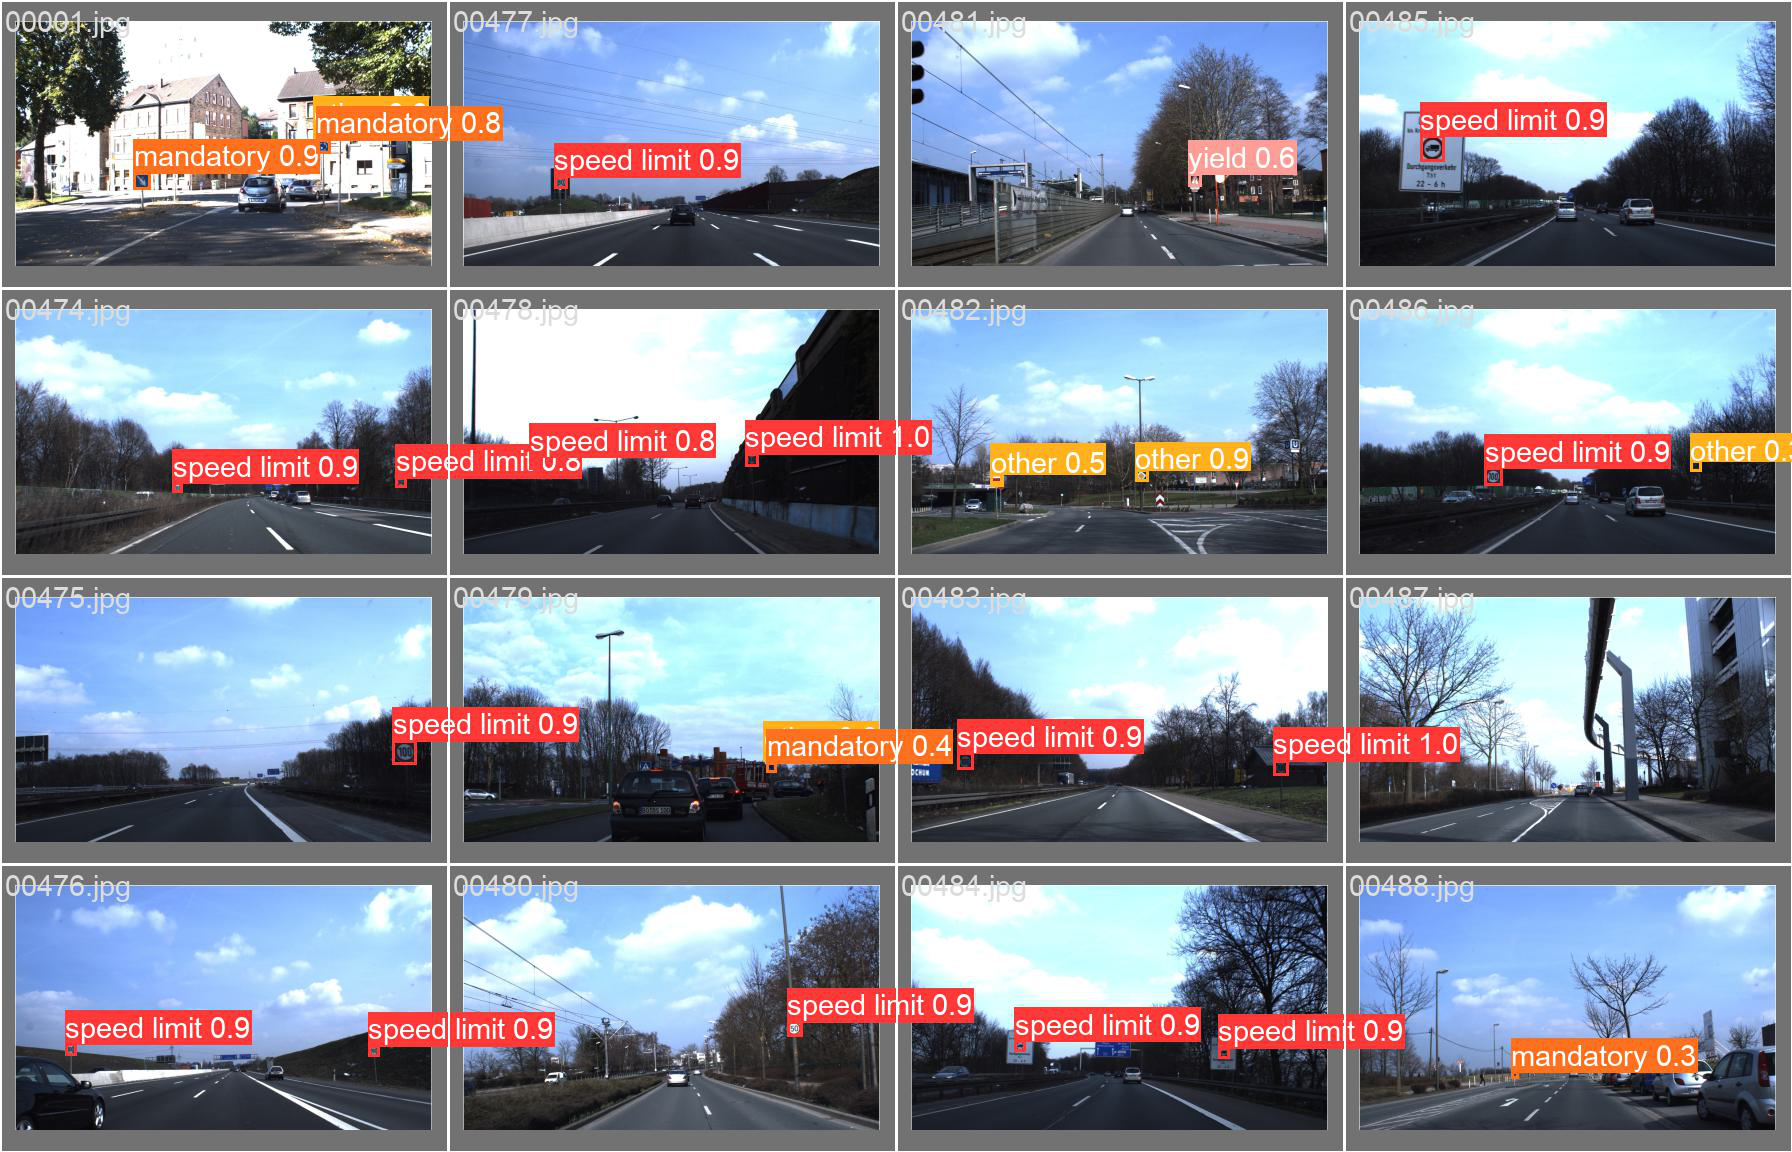

In [37]:
PIL.Image.open(str(pred_img[8]))

In [85]:
#cd yolov5

In [57]:
!python detect.py --source runs/train/exp/a.jpg --weights runs/train/exp/weights/best.pt --conf 0.25


detect: weights=['runs/train/exp/weights/best.pt'], source=runs/train/exp/a.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.9.7 torch-2.0.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/anubhoyar/Documents/MSUnivDocs/Python/ML/NNnotebook/Traffic_sign_detection_using_YOLO5/yolov5/runs/train/exp/a.jpg: 384x640 1 speed limit, 1 yield, 229.1ms
Speed: 1.2ms pre-process, 229.1ms inference, 7.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [61]:
test_img=list(data_dir.glob('runs/detect/exp3/*.jpg'))
test_img

[PosixPath('yolov5/runs/detect/exp3/a.jpg')]

### Testing on new image

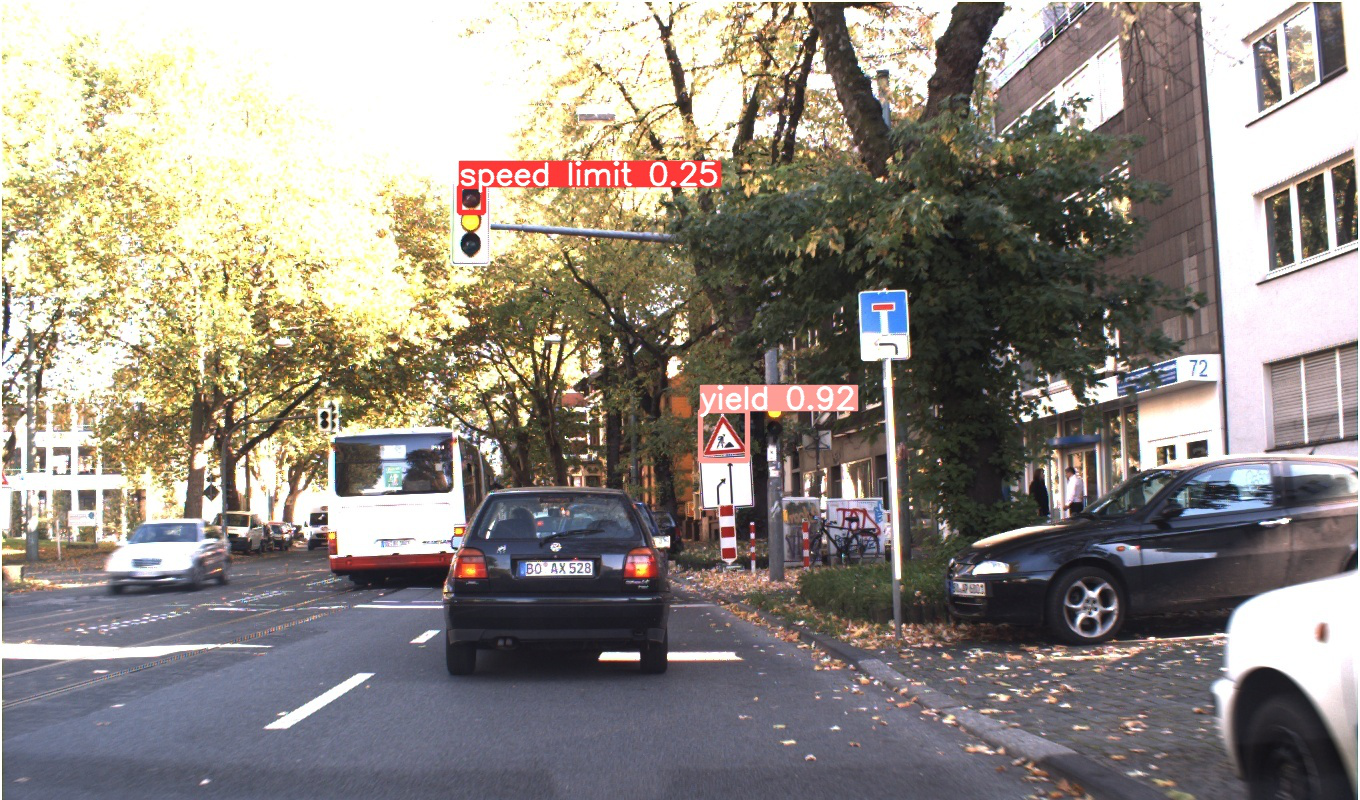

In [64]:
PIL.Image.open(str(test_img[0]))